# Calibration of the Selzerbeek subcatchment

The Selzerbeek subcatchment is calibrated for HBV in this Notebook. HBV is calibrated in combination with D-RR. This Notebook gives the calibration step by step.

## Import required packages

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import sys

## Locate the HBV model

In [2]:
workdir = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\HBV\HBV BMI Kalibratie"

In [3]:
sys.path.insert(0,f'{workdir}\HBVmodel')

## Import the required HBV packages

The Calibration_rr includes the D-RR output in the lag function of HBV, Calibration does not.

In [4]:
from HBVMod_bmi_rr import BmiHBV
from Forcing import Forcing
from Parameters import Parameters
#from Calibration import Calibration
from Calibration_rr import Calibration
from Validation import Validation
from Run import Run
from Plots import Calperiod_plot, Cal_plot, Cum_cal_plot, Dotty_plot, Valperiod_plot, Val_plot, Cum_val_plot

## Load the observations

In [5]:
Qobs = pd.read_excel(f'{workdir}\Meetdata/12Q31.xlsx',skiprows=4,index_col=[0],parse_dates=[0]) #read discharge data
Qobs.columns = ['Q']
Qobs.index.names = ['time']

## Select the observation timeperiods of the calibration and validation period

In [6]:
Qobs_cal = Qobs['2019-01-01':'2020-07-01 00:00:00'] #Select the time period
Qobs_val = Qobs['2020-07-01':'2021-07-01 00:00:00'] #Select the time period

## Define the upstream discharge

In this case no upstream discharge.

In [7]:
Qup_cal = 0
Qup_val = 0

## Plot the observations

<Axes: xlabel='time'>

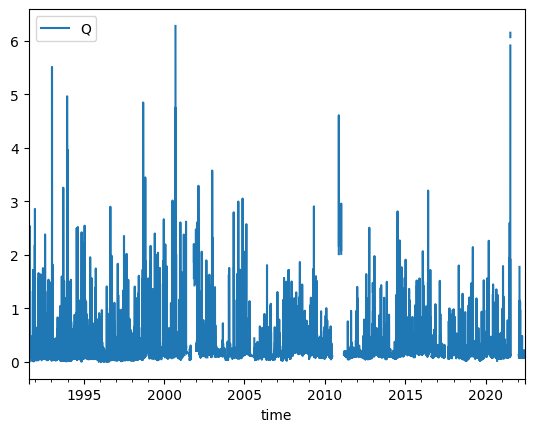

In [8]:
Qobs.plot()

## Define the corresponding D-RR output

In [9]:
Qrr_cal = pd.read_csv(f'{workdir}\D-HYDRO RR\Added_cities\RR_Calibration_Result.csv',index_col=[0],parse_dates=[0])
Qrr_cal = Qrr_cal['Selzerbeek']

Qrr_val = pd.read_csv(f'{workdir}\D-HYDRO RR\Added_cities\RR_Validation_Result.csv',index_col=[0],parse_dates=[0])
Qrr_val = Qrr_val['Selzerbeek']

## Plot the D-RR output

<Axes: xlabel='Location:'>

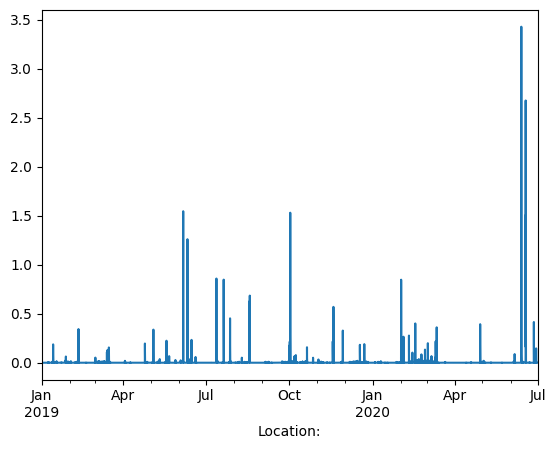

In [10]:
Qrr_cal.plot()

<Axes: xlabel='Location:'>

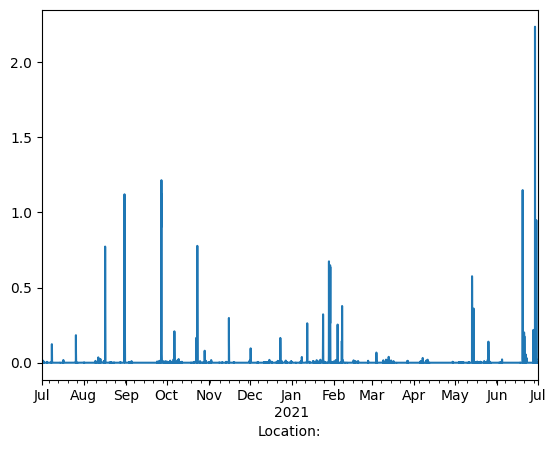

In [11]:
Qrr_val.plot()

## Plot D-RR output and observations

Text(0.5, 1.0, 'Selzerbeek')

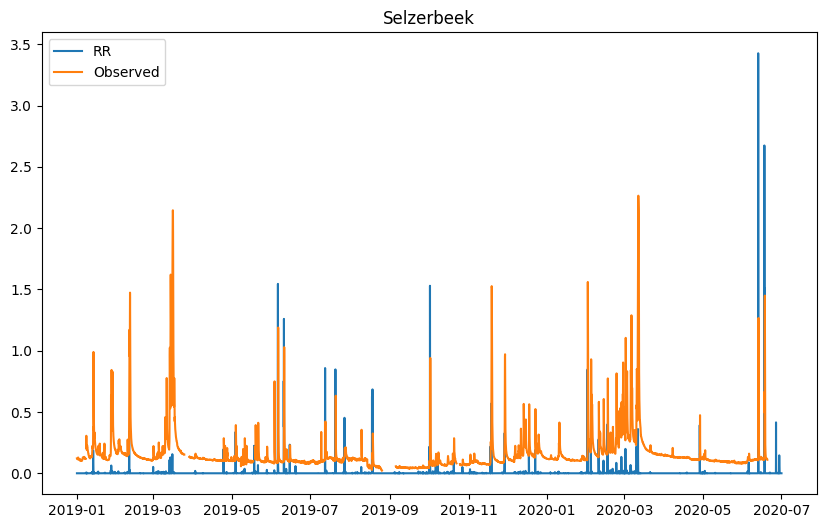

In [12]:
plt.figure(figsize=(10,6))
plt.plot(Qrr_cal, label='RR')
plt.plot(Qobs_cal, label='Observed')
plt.legend()
plt.title('Selzerbeek')

## Define the forcing

In [13]:
forcing_cal = Forcing(f'{workdir}\Forcing\Cal_Precipitation.csv',f'{workdir}\Forcing\Cal_Evaporation.csv','Selzerbeek')
forcing_val = Forcing(f'{workdir}\Forcing\Val_Precipitation.csv',f'{workdir}\Forcing\Val_Evaporation.csv','Selzerbeek')

## Define the parameter intervals

HBV is calibrated by the Monte-Carlo method with the parameter intervals. The intervals can be adjusted to improve the result. More information is given in the report.

In [14]:
          #      Imax    Ce    Sumax  beta  Pmax   Tlag   Kf     Ks
Parmin = np.array([1.05, 0.2,  500,    2,   0.01,   8,   0.03,  0.00184])
Parmax = np.array([2.95, 0.8,  800,    8,   0.05,  14,    0.1,  0.00224])

## Define the initial storages

In [15]:
Sin = [0 , 100, 0, 5]

## Define the subcatchment area

In [16]:
area = 27.6

## Define the calibration and validation period and their corresponding warm-up period

In [17]:
#             Begin warm-up         Start calibration       End calibration
cal_period = ['2019-01-01 00:00:00','2020-01-01 00:00:00','2020-07-01 00:00:00']
val_period = ['2020-07-01 00:00:00','2021-01-01 00:00:00','2021-07-01 00:00:00']

## Define the number of Monte-Carlo runs

In [18]:
nmax = 10000

## Define the minimum NSE value

In [19]:
nsemin = 0.4

## Run the calibration

The NSE is calculated for each Monte-Carlo run. The current run is printed to keep track of the calibration.

In [20]:
cal = Calibration(Parmin,Parmax,Sin,area,forcing_cal,Qobs_cal,Qup_cal,Qrr_cal,cal_period,nmax,nsemin)

## Select the run with the highest NSE value

In [21]:
index = (cal.C[:,8]).argmax()

In [22]:
Optpar = cal.C[index,0:8]
Optpar

array([1.11671825e+00, 4.12119339e-01, 7.03642221e+02, 4.19970852e+00,
       2.98131909e-02, 1.06133822e+01, 6.21943516e-02, 2.20649685e-03])

## Define the optimum parameterset

In [23]:
par = Parameters(Optpar,Sin,area)

## Run HBV with the optimum parameterset

In [24]:
run = Run(par,forcing_cal,Qobs_cal,Qrr_cal,Qup_cal)

## Plot the calibration HBV run of the optimum parameterset

### Including warm-up period

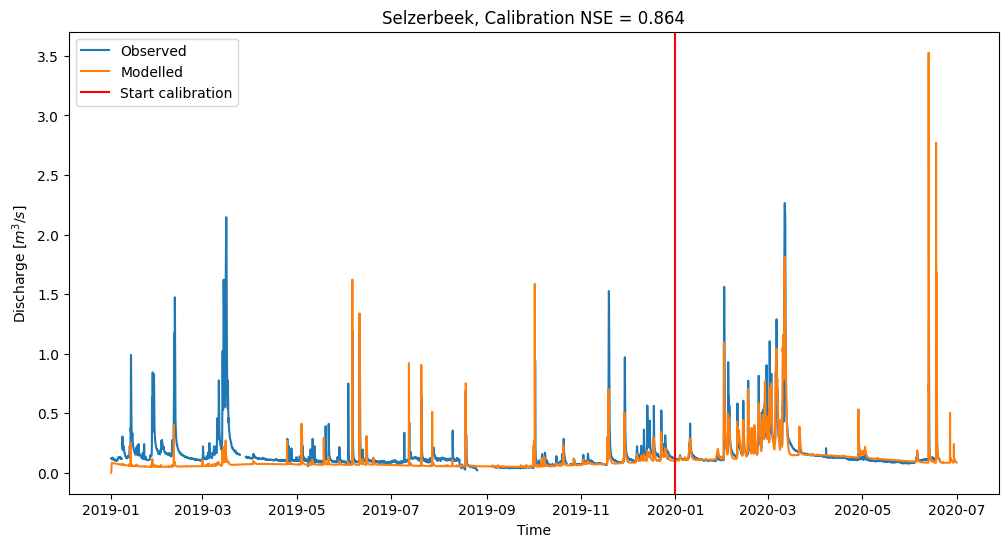

In [25]:
Calperiod_plot(cal,run,cal_period,'Selzerbeek')

### Excluding warm-up period

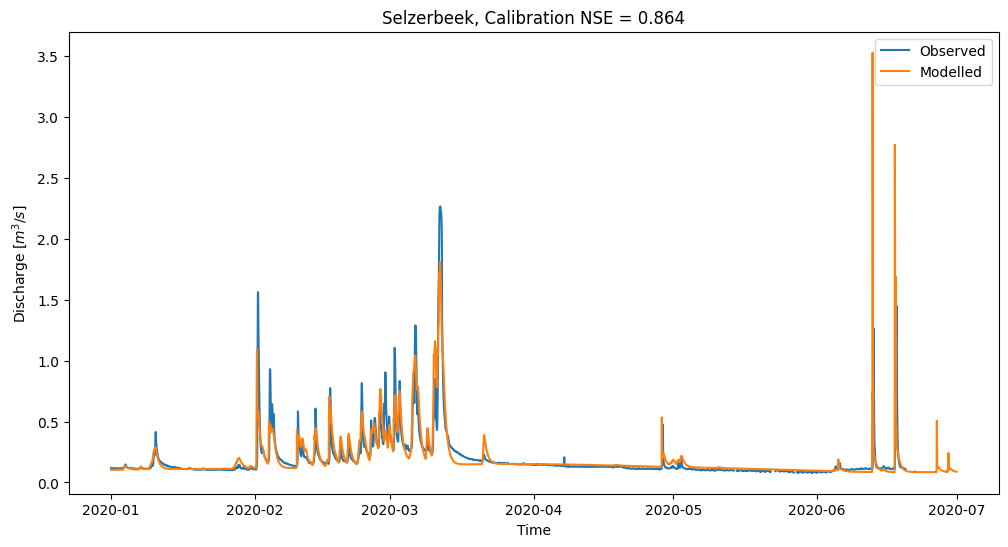

In [26]:
Cal_plot(cal,run,cal_period,'Selzerbeek')

## Plot cumulative discharge of the calibration period, excluding warm-up period

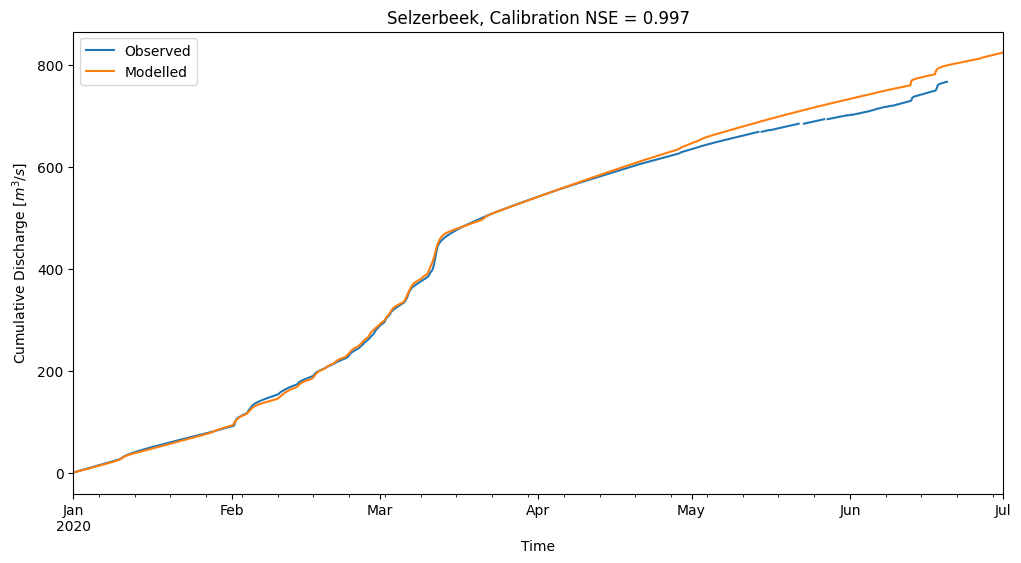

In [27]:
Cum_cal_plot(cal,run,cal_period,'Selzerbeek')

## Plot the dotty plots

The dotty plots show the NSE value corresponding to the parameter value. The parameter intervals can be adjusted by reading these plots.

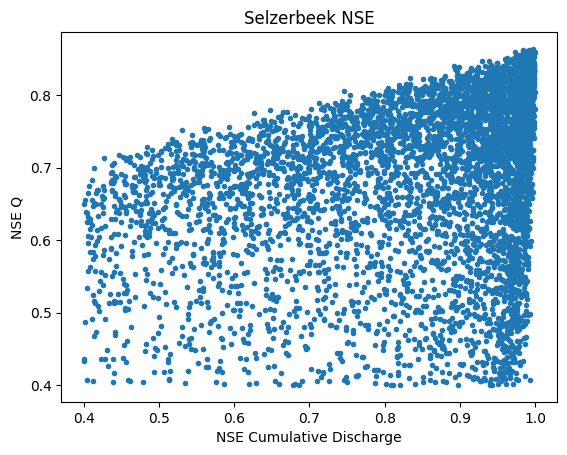

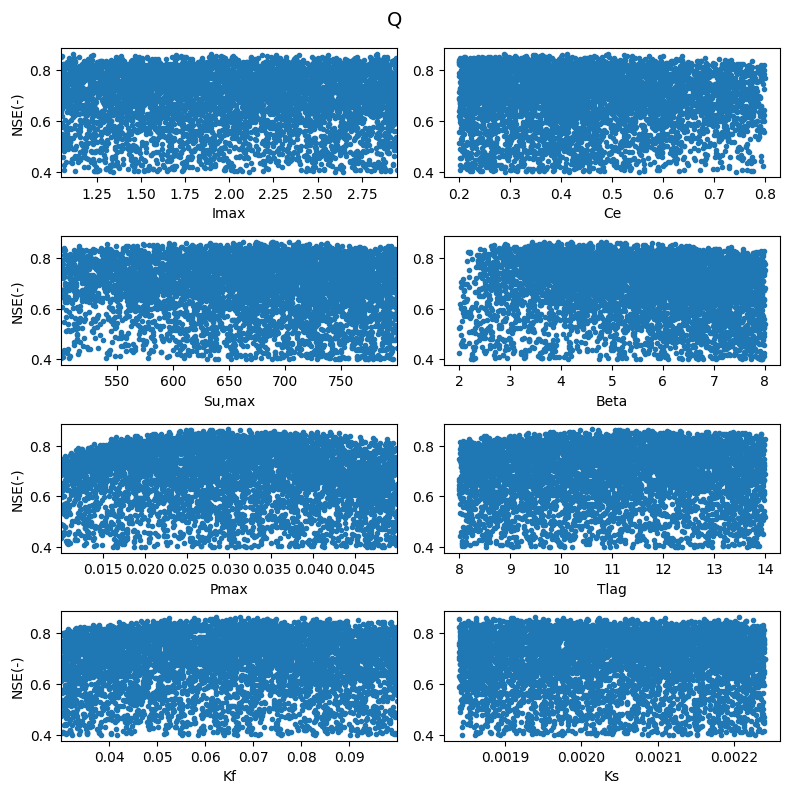

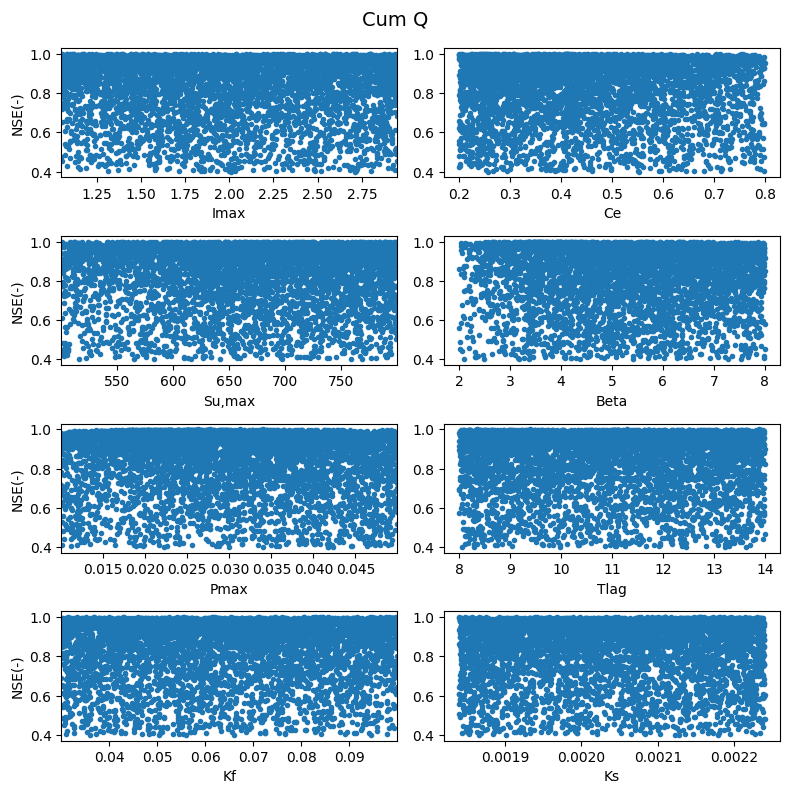

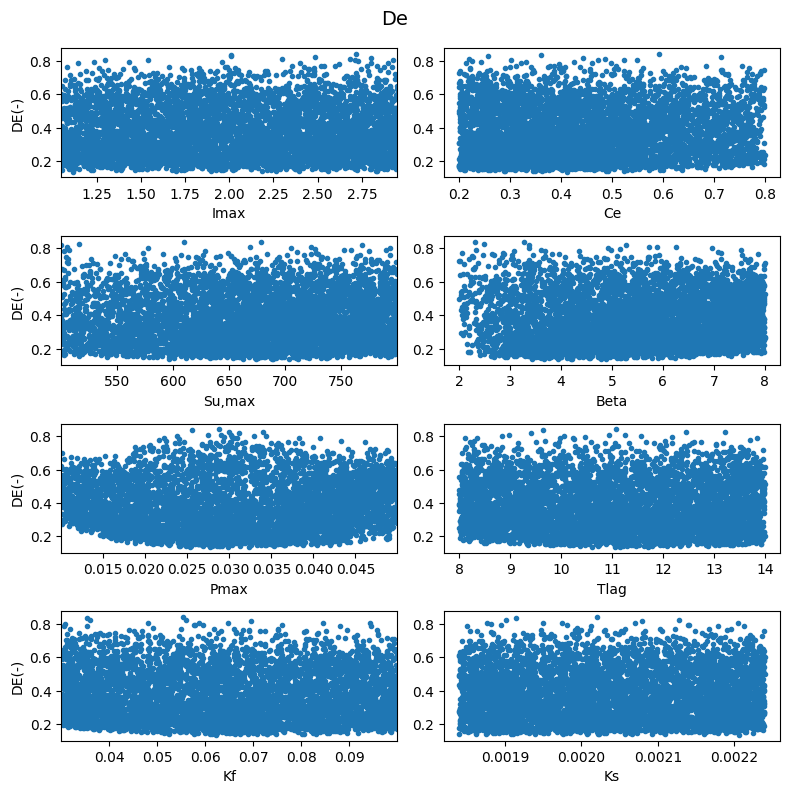

In [28]:
Dotty_plot(cal,run,cal_period,'Selzerbeek')

## Run HBV for the validation period with the optimum parameterset

In [29]:
val = Validation(Optpar,Sin,area,forcing_val,Qobs_val,Qup_val,Qrr_val,val_period)

## Plot the validation run

### Including warm-up period

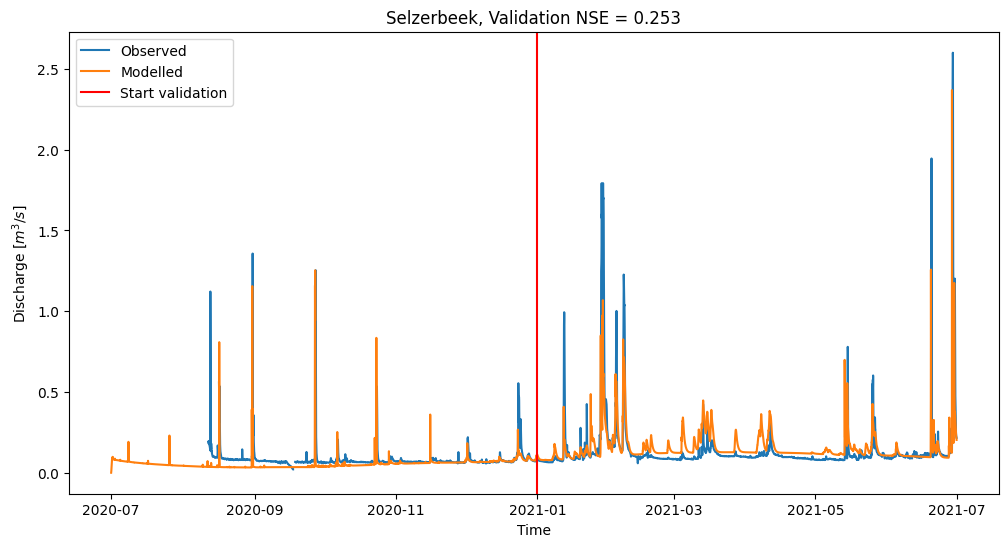

In [30]:
Valperiod_plot(val,val_period,'Selzerbeek')

### Excluding warm-up period

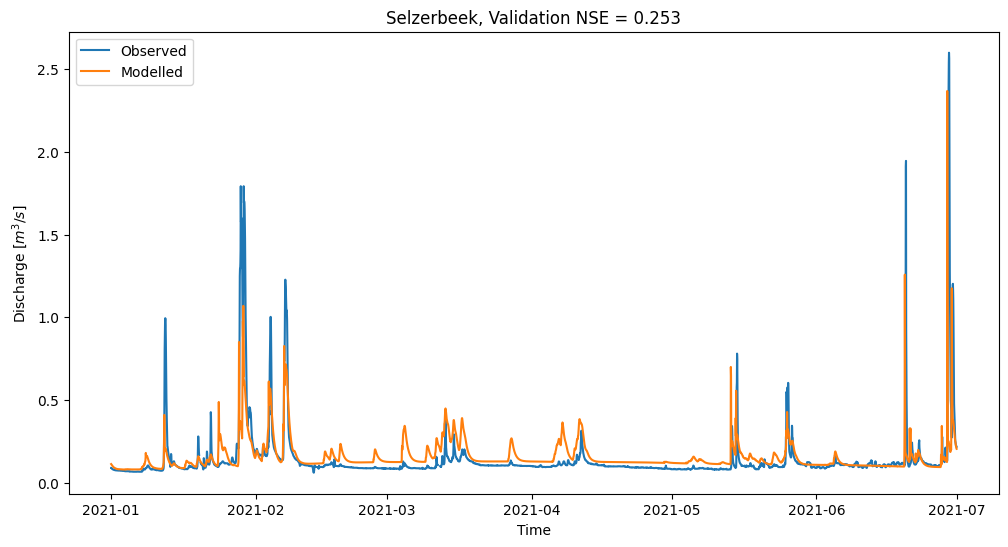

In [31]:
Val_plot(val,val_period,'Selzerbeek')

## Plot cumulative discharge of the validation period, excluding warm-up period

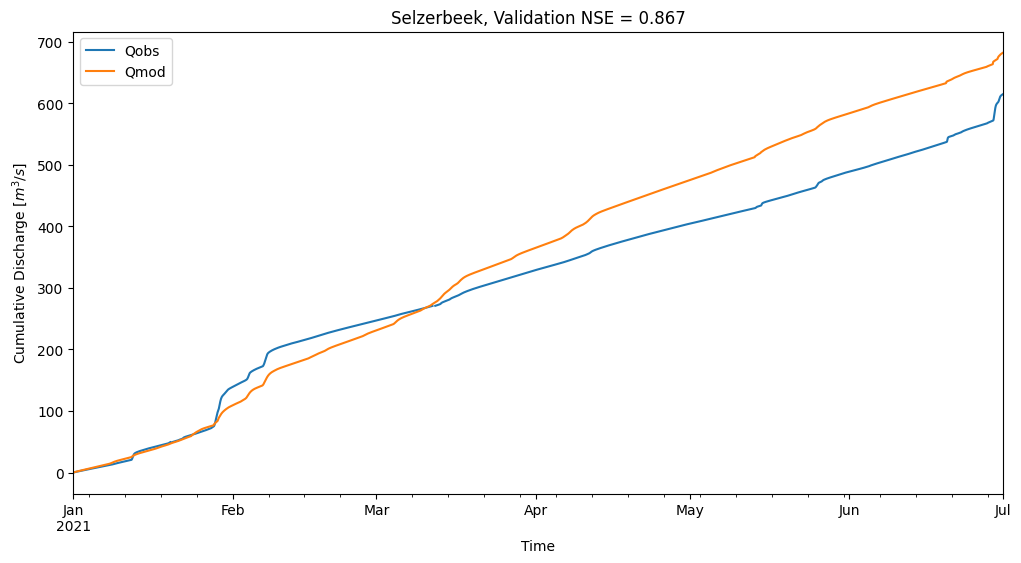

In [32]:
Cum_val_plot(val,val_period,'Selzerbeek')